In [7]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [37]:
data = pd.read_csv('/content/movies.csv', header=0)

In [38]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [39]:
# check missing data
print(data.isna().sum())

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [40]:
data.dtypes

,0
name,object
rating,object
genre,object
year,int64
released,object
score,float64
votes,float64
director,object
writer,object
star,object


In [41]:
data.shape

(7668, 15)

In [42]:
data['budget'] = data['budget'].fillna(0)
data['gross'] = data['gross'].fillna(0)

In [43]:
data['budget'] = data['budget'].astype('int64')
data['gross'] = data['gross'].astype('int64')
print(data.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object


In [44]:
data['released'] = data['released'].astype('str')

In [45]:
data['year'] = data['year'][:4]
data['year'] = data['year'].fillna(0)
data['year'] = data['year'].astype('int')

data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,0,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [46]:
# pd.set_option('display.max_rows',None)

In [47]:
data = data.sort_values(by='gross',ascending=False)

In [53]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,0,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,0,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,0,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,0,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,0,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [57]:
data1 = data.drop_duplicates()
data1.shape

(7668, 15)

In [58]:
data1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,0,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,0,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,0,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,0,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,0,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


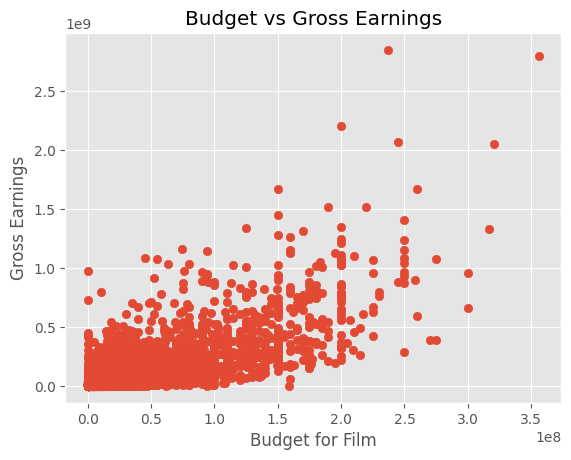

In [59]:
#building a scatterplot budget vs gross

plt.scatter(x=data1['budget'],y=data1['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

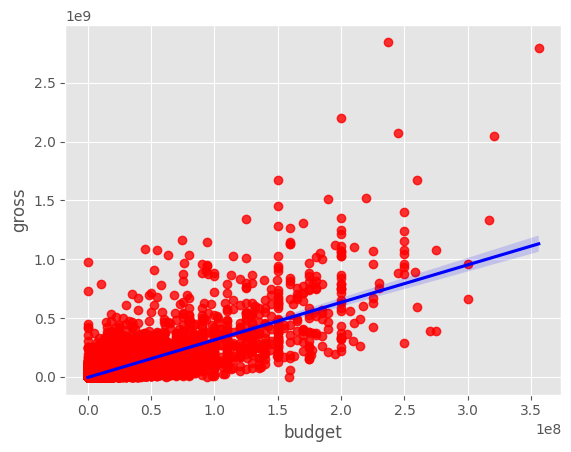

In [64]:
# plot budget vs gross
sns.regplot(x='budget',y='gross',data=data1,scatter_kws={'color':'red'},line_kws={'color':'blue'})

In [67]:
data.select_dtypes(include=[float, int]).corr()#default is pearson, other ones include - kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.029709,0.072076,-0.008445,0.014666,0.010132
score,0.029709,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.072076,0.409182,1.000000,0.486862,0.632834,0.309212
budget,-0.008445,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.014666,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.010132,0.399451,0.309212,0.269510,0.245235,1.000000


In [68]:
#budget and gross are highly correalted

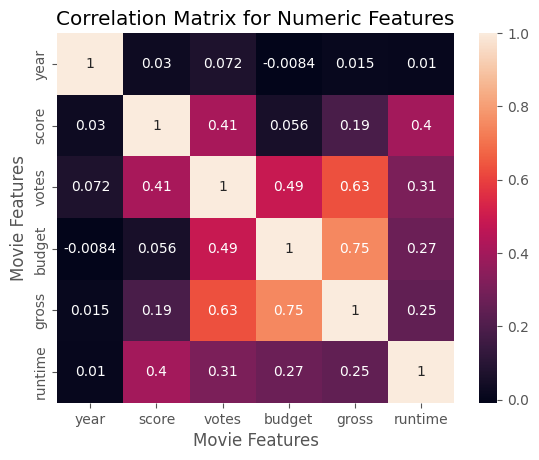

In [70]:
correlation_matrix = data.select_dtypes(include=[float, int]).corr('pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [72]:
data.dtypes

,0
name,object
rating,object
genre,object
year,int64
released,object
score,float64
votes,float64
director,object
writer,object
star,object


In [96]:
def convert_string_to_categories(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype('category')
            df[col] = df[col].cat.codes
    return df

# Apply the function to your data
df_numerized = convert_string_to_categories(data)

# Select only numeric columns for correlation calculation
numeric_columns = df_numerized.select_dtypes(include=['int64', 'float64']).columns

In [101]:
print(numeric_columns)

Index(['year', 'score', 'votes', 'budget', 'gross', 'runtime'], dtype='object')


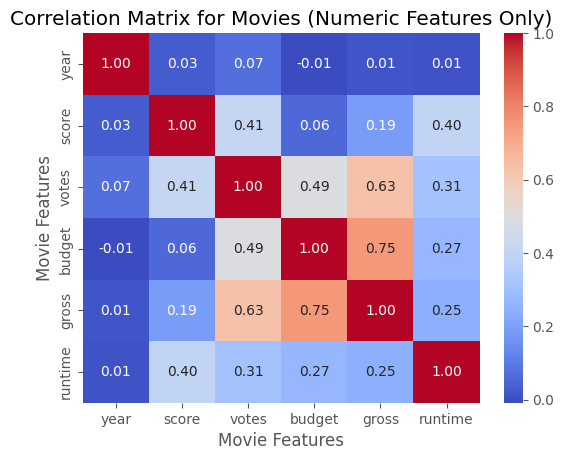

In [102]:
#heatmap for all
correlation_matrix = df_numerized[numeric_columns].corr(method='pearson')

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Matrix for Movies (Numeric Features Only)")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [105]:
x = correlation_matrix.unstack()
x = x.sort_values(ascending=False)
print(x)

year     year       1.000000
score    score      1.000000
gross    gross      1.000000
budget   budget     1.000000
votes    votes      1.000000
runtime  runtime    1.000000
budget   gross      0.750157
gross    budget     0.750157
         votes      0.632834
votes    gross      0.632834
budget   votes      0.486862
votes    budget     0.486862
score    votes      0.409182
votes    score      0.409182
runtime  score      0.399451
score    runtime    0.399451
runtime  votes      0.309212
votes    runtime    0.309212
budget   runtime    0.269510
runtime  budget     0.269510
         gross      0.245235
gross    runtime    0.245235
         score      0.186392
score    gross      0.186392
votes    year       0.072076
year     votes      0.072076
budget   score      0.055665
score    budget     0.055665
year     score      0.029709
score    year       0.029709
gross    year       0.014666
year     gross      0.014666
         runtime    0.010132
runtime  year       0.010132
year     budge

In [106]:
sorted_value = x[x>0.5]
print(sorted_value)

year     year       1.000000
score    score      1.000000
gross    gross      1.000000
budget   budget     1.000000
votes    votes      1.000000
runtime  runtime    1.000000
budget   gross      0.750157
gross    budget     0.750157
         votes      0.632834
votes    gross      0.632834
dtype: float64


In [ ]:
#company has low correlation